In [1]:
import pandas as pd

data = pd.read_csv("datasets/tweets-with-topics.csv", encoding = "utf-8")

data.head()

,tweet,topic
0,@sssdddnnn333 @MohammedAlDeaye حارس حتى عنده ض...,Sports
1,RT @fahadaljehani: الكثير من المتعة كانت حاضره...,Sports
2,RT @aboaljorya: @AhmedAllshehri عذيب 👀\nالسعر ...,Business
3,RT @salem_d29: الحمدلله ، شعوري لا يوصف ، ولن ...,Sports
4,أبل أبدعت بهذي الميزة الأمر مستحيل ومجرد خيال ...,Technology


In [ ]:
import nltk

nltk.download("punkt")
nltk.download("stopwords")

In [3]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from snowballstemmer import stemmer

stop_words = stopwords.words("arabic")
stemmer = stemmer("arabic")

In [4]:
import string
import re

def sanitize_text(text):
  # https://unicode.org/emoji/charts/full-emoji-list.html
  emojis = re.compile("["
            u"\U0001F600-\U0001F64F"  
            u"\U0001F300-\U0001F5FF"  
            u"\U0001F680-\U0001F6FF"  
            u"\U0001F1E0-\U0001F1FF" 
            u"\U00002500-\U00002BEF"  
            u"\U00002702-\U000027B0"
            u"\U00002702-\U000027B0"
            u"\U000024C2-\U0001F251"
            u"\U0001f926-\U0001f937"
            u"\U00010000-\U0010ffff"
            u"\u2640-\u2642" 
            u"\u2600-\u2B55"
            u"\u200d"
            u"\u23cf"
            u"\u23e9"
            u"\u231a"
            u"\ufe0f"  
            u"\u3030"
            u"\u2066"
                        "]+", re.UNICODE)
  
  text = re.sub(emojis, "", text)
    
  text = re.sub("@[^\s]+","",text)
    
  text = re.sub("RT", "", text)
  
  numbers = "٠١٢٣٤٥٦٧٨٩"
  arabic_punctuations = '''`÷×؛<>_()*^ـ،/:"؟.,'~¦+|!”…“–ـ'''
  english_puncuations = string.punctuation

  chars_to_remove = numbers  + arabic_punctuations + english_puncuations

  for char in chars_to_remove:
    text = text.replace(char, "")
    
  # remove repeated chars
  text = re.sub(r"(.)\1{2,}", r"\1", text)

  text = text.replace("\n", " ")
  text = text.strip()

  return text

In [5]:
def process_text(text):
  text = sanitize_text(text)
  
  tokens = word_tokenize(text)
  tokens = [token for token in tokens if token not in stop_words]
  tokens = [stemmer.stemWord(token) for token in tokens]

  return tokens

def toSentence(tokens):
  return " ".join(tokens).strip()

In [6]:
tweet = "أنا أحب الذهاب إلى الحديقة 🌝، كل يوم 9 صباحاً، مع رفاقي هؤلاء! @toto  "

processed_tweet = process_text(tweet)

processed_tweet

['احب', 'ذهاب', 'حديق', 'يوم', '9', 'صباح', 'رفاق']

In [7]:
data["tweet"] = data["tweet"].apply(process_text)

data.head()

,tweet,topic
0,"[حارس, عند, ضعف, نظر, مدر, يحرص, عموم, حال, حا...",Sports
1,"[كثير, متع, كان, حاضر, ملعب, قيم, الفن, عاليه,...",Sports
2,"[عذيب, سعر, حال]",Business
3,"[حمدلله, شعور, يوصف, ولن, انسي, فضل, جمهور, هل...",Sports
4,"[ابل, ابدع, بهذ, ميز, امر, مستحيل, مجرد, خيال,...",Technology


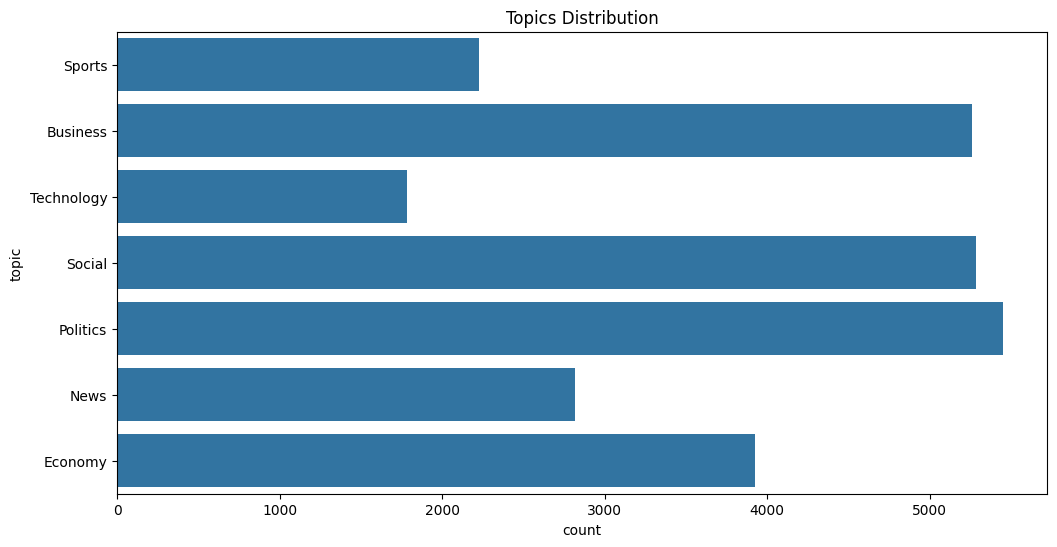

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (12,  6))

sns.countplot(data = data, y = "topic")
plt.title("Topics Distribution")

plt.show()

In [9]:
from imblearn.over_sampling import RandomOverSampler

resampler = RandomOverSampler(random_state = 0)

data, y = resampler.fit_resample(data, data.topic)

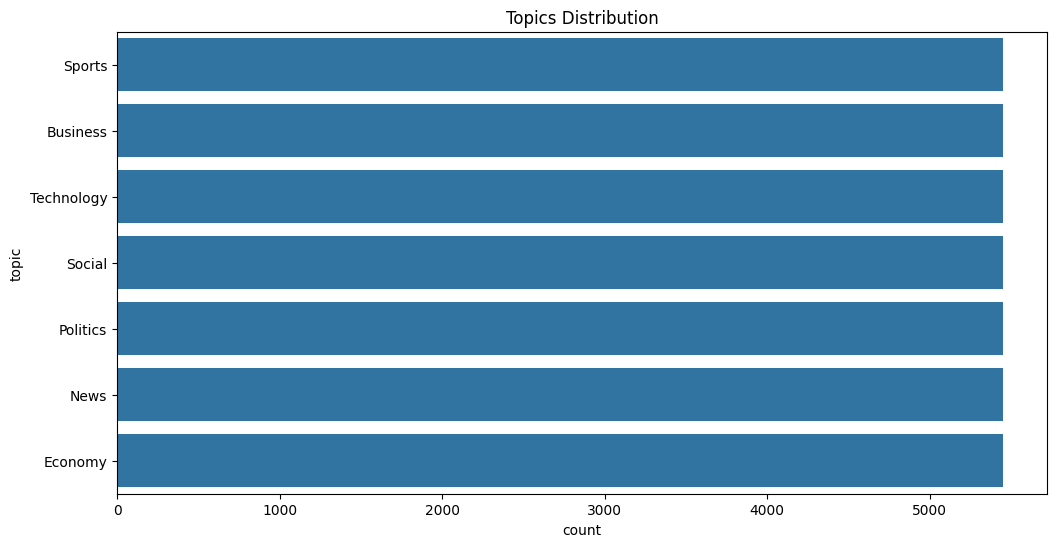

In [10]:
plt.figure(figsize = (12,  6))

sns.countplot(data = data, y = "topic")
plt.title("Topics Distribution")

plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder

topicEncoder = LabelEncoder()

data["topic"] = data[["topic"]].apply(topicEncoder.fit_transform)

classes = topicEncoder.classes_

classes, topicEncoder.transform(classes)

(array(['Business', 'Economy', 'News', 'Politics', 'Social', 'Sports',
        'Technology'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 6]))

In [13]:
tweets = data["tweet"].apply(toSentence)

tweets

0        حارس عند ضعف نظر مدر يحرص عموم حال حال لاعب هل...
1        كثير متع كان حاضر ملعب قيم الفن عاليه سالمالدو...
2                                             عذيب سعر حال
3        حمدلله شعور يوصف ولن انسي فضل جمهور هلال عل شخ...
4        ابل ابدع بهذ ميز امر مستحيل مجرد خيال سنة ايبا...
                               ...                        
38145                            تحديث سء جدا حاس علي تايم
38146    ناو استاجر شقة او بيت او محل وتب تعرف سعر ال م...
38147    فايروس خطير جدا استهدف مستخدم نظام اندرويد قاد...
38148    اسهل طريق لتحميل مقاطع فيديو تويتر طريق ادا رن...
38149                      مسابق مستقبلTECH اضاف خمس ازرار
Name: tweet, Length: 38150, dtype: object

In [16]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()

tokenizer.fit_on_texts(tweets)

len(tokenizer.word_counts)

22672

In [24]:
num_words = 1000

tokenizer = Tokenizer(num_words = num_words)

tokenizer.fit_on_texts(tweets)

x = tokenizer.texts_to_sequences(tweets)

x[0:2]

[[48, 210, 167, 167, 620, 2, 167], [288, 242, 189, 315, 452, 156]]

In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_sequence_length = 50

x = pad_sequences(x, maxlen = max_sequence_length)

x[0:2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,  48, 210, 167, 167, 620,   2, 167],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 288, 242, 189, 315, 452, 156]])

In [27]:
from sklearn.model_selection import train_test_split

y = data["topic"]

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [28]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, LSTM

model = Sequential([
  Embedding(input_dim = num_words, output_dim = 32),
  LSTM(units = 16, dropout = 0.2),
  Dense(units = 7, activation = "softmax")
])

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [29]:
model_output = model.fit(x_train, y_train, batch_size = 32, epochs = 10, validation_data = (x_test, y_test))

Epoch 1/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 88s 51ms/step - accuracy: 0.5898 - loss: 1.2686 - val_accuracy: 0.7919 - val_loss: 0.6018
Epoch 2/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 75s 41ms/step - accuracy: 0.8210 - loss: 0.5331 - val_accuracy: 0.8302 - val_loss: 0.5060
Epoch 3/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 40s 40ms/step - accuracy: 0.8423 - loss: 0.4614 - val_accuracy: 0.8324 - val_loss: 0.4894
Epoch 4/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.8481 - loss: 0.4379 - val_accuracy: 0.8370 - val_loss: 0.4811
Epoch 5/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 37s 41ms/step - accuracy: 0.8551 - loss: 0.4145 - val_accuracy: 0.8392 - val_loss: 0.4750
Epoch 6/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 39s 39ms/step - accuracy: 0.8645 - loss: 0.3917 - val_accuracy: 0.8435 - val_loss: 0.4710
Epoch 7/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.8675 - loss: 0.3851 - val_accuracy: 0.8461 - val_loss: 0.4676
Epoch 8/10
895/895 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.8690 - loss: 0.3751 - 

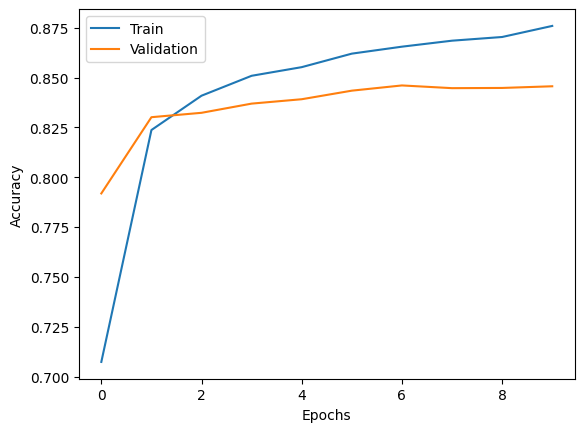

In [30]:
plt.plot(model_output.history["accuracy"], label = "Train")
plt.plot(model_output.history["val_accuracy"], label = "Validation")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [31]:
model.save("23-dumps/model.keras")

In [33]:
from joblib import dump

dump(tokenizer, "23-dumps/tokenizer.pkl")

['23-dumps/tokenizer.pkl']

In [44]:
import numpy as np

def tweet_classifier(tweet):
  sequences = tokenizer.texts_to_sequences([tweet])
  sequences = pad_sequences(sequences, maxlen = max_sequence_length)

  predictions = model.predict(sequences)
  prediction = np.argmax(predictions)

  return prediction

In [46]:
topics = ["Business", "Economy", "News", "Politics", "Social", "Sports", "Technology"]

def tweets_classifier(data_path):
  tweets_data = pd.read_csv(data_path, encoding = "utf-8")

  tweets_count_per_topic = dict()
  for i in range(len(topics)):
    tweets_count_per_topic[classes[i]] = 0

  for _, row in tweets_data.iterrows():
    tweet = row["tweet"]
    processed_tweet = process_text(tweet)

    tweet_topic_index = tweet_classifier(processed_tweet)
    tweet_topic = topics[tweet_topic_index]
    tweets_count_per_topic[tweet_topic] += 1

  x = tweets_count_per_topic.keys()
  y = tweets_count_per_topic.values()

  plt.figure(figsize = (5, 5))
  plt.pie(y, labels = x, autopct = "%1.1f%%")
  plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 879ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 569ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 380ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 382ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 591ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 495ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 821ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 330ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 791ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 327ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

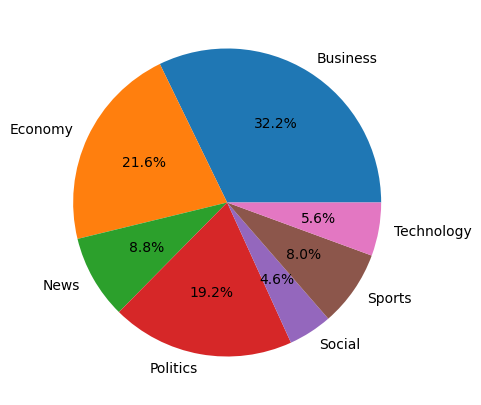

In [47]:
tweets_classifier("datasets/tweets-to-classify.csv")